### EDA on Climate Text Data

#### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly as py
import cufflinks as cf

from plotly.offline import iplot

import textblob

In [2]:
py.offline.init_notebook_mode(connected = True)
cf.go_offline()

#### Data Import & Formatting the Dataset for Sentiment Analysis

In [3]:
df = pd.read_csv('Climate_twitter.csv')
df.head()

,id,date,retweets,source,author,likes,text,twitter_name,location,verified,followers,friends,polarity,subjectivity
0,2184934963,2020-12-22 23:22:20,71,Twitter Web App,GO GREEN,91,The death of summer Arctic ice our Earth coole...,ECOWARRIORSS,NaN,False,23415,20439,-0.054365,0.426984
1,508658626,2020-12-10 14:30:00,14,Twitter for Advertisers,Elsevier Energy,98,Elsevier and the EditorsinChief are pleased to...,ElsevierEnergy,"Oxford, England",False,6615,508,0.387500,0.633333
2,2607105006,2020-12-22 21:28:52,0,Twitter Web App,Arwyn Thomas,1,From better climate change education to improv...,siwarr5,Carmarthen,False,22,133,0.261905,0.345238
3,19609660,2020-12-22 21:24:10,0,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",0,climate change Links to FIXING CLIMATE CHANGE ...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000
4,19609660,2020-12-21 22:52:09,1,Twitter Web App,"Tom Gillispie, EDITOR/WRITER",1,climate change The 11TH HOUR FOR THE EARTH cli...,EDITORatWORK,"Rural Hall, North Carolina, USA",False,4191,3708,0.000000,0.000000


In [4]:
df = df.drop(columns=['id','date','source','author','twitter_name','location','verified','retweets','likes','followers','friends'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
dtypes: float64(2), object(1)
memory usage: 9.4+ KB


In [5]:
conditions = [
    (df['polarity'] <= -0.05),
    (df['polarity'] > -0.05) & (df['polarity'] < 0.05),
    (df['polarity'] >= 0.05)]

values = [-1,0,1]

df['label'] = np.select(conditions, values)

df.head()

,text,polarity,subjectivity,label
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1
1,Elsevier and the EditorsinChief are pleased to...,0.387500,0.633333,1
2,From better climate change education to improv...,0.261905,0.345238,1
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    object 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   label         396 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.5+ KB


In [7]:
# convert text column to string for easier processing
df['text'] = df['text'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          396 non-null    string 
 1   polarity      396 non-null    float64
 2   subjectivity  396 non-null    float64
 3   label         396 non-null    int64  
dtypes: float64(2), int64(1), string(1)
memory usage: 12.5 KB


#### Preprocessing Text

In [8]:
' '.join(df['text'].tolist())

'The death of summer Arctic ice our Earth cooler is now just a few years away if not sooner triggering a world wide climate planet break down supercharging global warming leaving much of the planet hostile to life abrupt climate change is only a matter of timeEnd fossil fuel Elsevier and the EditorsinChief are pleased to share the first volume of Energy and Climate Change now available on ScienceDirect Get FREE ACCESS until 1 June 2021 From better climate change education to improved sustainability heres what 2020 got right about environmental justice and global warming climate change environment hometopstory climate change Links to FIXING CLIMATE CHANGE climatechange CO2 global warming climate change The 11TH HOUR FOR THE EARTH climatechange global warming GlobalWarming For years now scientists and governments have discussed and debated the effects of climate change and global warming Very little has been doneHave a look at Climate Change over the Centuryenvironment climate Change The

In [9]:
# Expanding Contractions
contractions = {"ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}


In [10]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [11]:
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))
' '.join(df['text'].tolist())

'The death of summer Arctic ice our Earth cooler is now just a few years away if not sooner triggering a world wide climate planet break down supercharging global warming leaving much of the planet hostile to life abrupt climate change is only a matter of timeEnd fossil fuel Elsevier and the EditorsinChief are pleased to share the first volume of Energy and Climate Change now available on ScienceDirect Get FREE ACCESS until 1 June 2021 From better climate change education to improved sustainability heres what 2020 got right about environmental justice and global warming climate change environment hometopstory climate change Links to FIXING CLIMATE CHANGE climatechange CO2 global warming climate change The 11TH HOUR FOR THE EARTH climatechange global warming GlobalWarming For years now scientists and governments have discussed and debated the effects of climate change and global warming Very little has been doneHave a look at Climate Change over the Centuryenvironment climate Change The

#### Feature Engineering

In [12]:
df.head()
# we're going to add length of text, word count, and average word length columns.
# also, we will use textblob to add sentiment polarity columns

,text,polarity,subjectivity,label
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1
1,Elsevier and the EditorsinChief are pleased to...,0.387500,0.633333,1
2,From better climate change education to improv...,0.261905,0.345238,1
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0


In [13]:
from textblob import TextBlob

In [14]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [15]:
df['text_length'] = df['text'].apply(lambda x: len(x))

In [16]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [17]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)

    return word_len/len(words)

In [18]:
df['avg_word_length'] = df['text'].apply(lambda x: get_avg_word_len(x))

In [19]:
df.head()

,text,polarity,subjectivity,label,text_length,word_count,avg_word_length
0,The death of summer Arctic ice our Earth coole...,-0.054365,0.426984,-1,274,49,4.612245
1,Elsevier and the EditorsinChief are pleased to...,0.387500,0.633333,1,163,27,5.074074
2,From better climate change education to improv...,0.261905,0.345238,1,176,23,6.695652
3,climate change Links to FIXING CLIMATE CHANGE ...,0.000000,0.000000,0,78,11,6.181818
4,climate change The 11TH HOUR FOR THE EARTH cli...,0.000000,0.000000,0,85,12,6.166667


#### Exploring Variable Distributions

In [20]:
df['polarity'].iplot(kind = 'hist', xTitle = 'Polarity', yTitle = 'Count', title = 'Sentiment Polarity Distribution', bins = 50)
# most of the text entries have very neutral sentiment

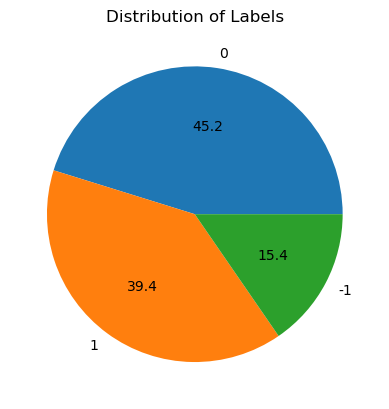

In [22]:
label_counts = df['label'].value_counts().reset_index().rename(columns={"index": "value", 0: "count"})
label_counts
labels_dist = plt.pie(label_counts['count'], labels=label_counts['label'], autopct='%.1f')
plt.title("Distribution of Labels")
plt.show()

In [23]:
df['text_length'].iplot(kind = 'hist', xTitle = 'Text Length', yTitle = 'Count', title = "Distribution of Text Length", bins = 50)

In [24]:
df['word_count'].iplot(kind = 'hist', xTitle = 'Word Count', yTitle = 'Count', title = "Distribution of Word Count")

In [25]:
df['avg_word_length'].iplot(kind = 'hist', xTitle = 'Average Word Length', yTitle = 'Count', title = "Distribution of Average Word Length", bins = 50)

#### Distribution of Unigram, Bigram, and Trigram

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

##### Unigrams

In [28]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams

In [29]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [30]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams

In [31]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [32]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')

##### Removing Stop Words for More Useful Distributions

##### Unigrams without Stop Words

In [33]:
def get_top_n_words(x, n):
    vec = CountVectorizer(stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [34]:
words = get_top_n_words(df['text'], 20)
dfUni = pd.DataFrame(words, columns = ['Unigram','Frequency'])
dfUni = dfUni.set_index('Unigram')
dfUni.iplot(kind = 'bar', xTitle='Unigram', yTitle='Frequency', title = 'Top 20 Unigram Words')

##### Bigrams without Stop Words

In [35]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [36]:
words = get_top_n_words(df['text'], 20)
dfBi = pd.DataFrame(words, columns = ['Bigram','Frequency'])
dfBi = dfBi.set_index('Bigram')
dfBi.iplot(kind = 'bar', xTitle='Bigram', yTitle='Frequency', title = 'Top 20 Bigram Words')

##### Trigrams without Stop Words

In [37]:
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3,3), stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
    return word_freq[:n]

In [38]:
words = get_top_n_words(df['text'], 20)
dfTri = pd.DataFrame(words, columns = ['Trigram','Frequency'])
dfTri = dfTri.set_index('Trigram')
dfTri.iplot(kind = 'bar', xTitle='Trigram', yTitle='Frequency', title = 'Top 20 Trigram Words')